In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [298]:
data1 = pd.read_csv(r'WalmartDataSet.csv')
data1['Date'] = pd.to_datetime(data1['Date'], dayfirst=True)
data1.set_index('Date', inplace=True)
# There are about 45 different stores in this dataset. Lets select the any store id from 1-45
a= int(input("Enter the store id:"))
store = data1[data1.Store == a]
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales.dtypes

Enter the store id: 11


Weekly_Sales    float64
dtype: object

In [290]:
data1.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [254]:
sales.head(20)

,Weekly_Sales
Date,
01-04-2011,1827733.18
01-06-2012,1767471.48
01-07-2011,1751369.75
01-10-2010,1645892.97
02-03-2012,1990371.02
02-04-2010,2138651.97
02-07-2010,1845893.87
02-09-2011,1758587.35
02-12-2011,2068097.18


In [291]:
# Check for null values
data1.isnull().sum()



Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [292]:
# Describe numerical columns
data1.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [374]:
# Select first 5 unique store IDs
store_ids = data1['Store'].unique()[:5]

In [377]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


=== Forecasting for Store 1 ===


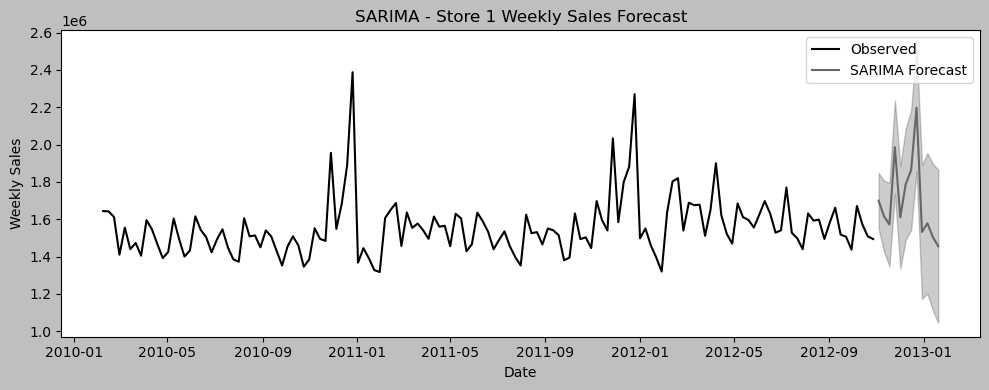

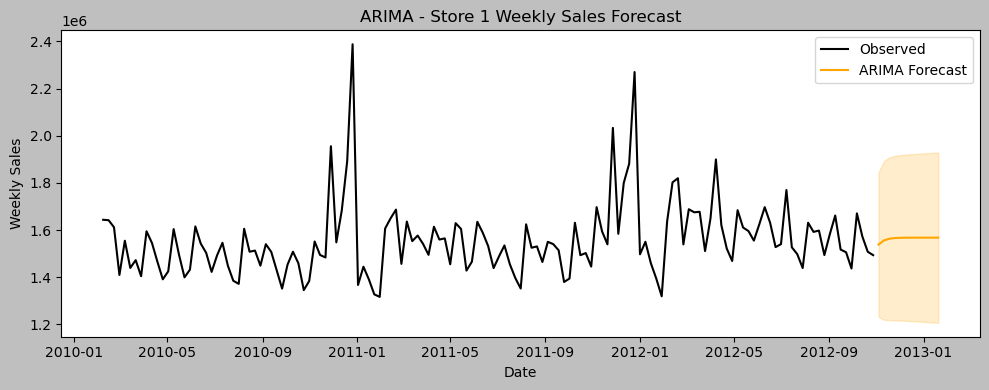


=== Forecasting for Store 2 ===


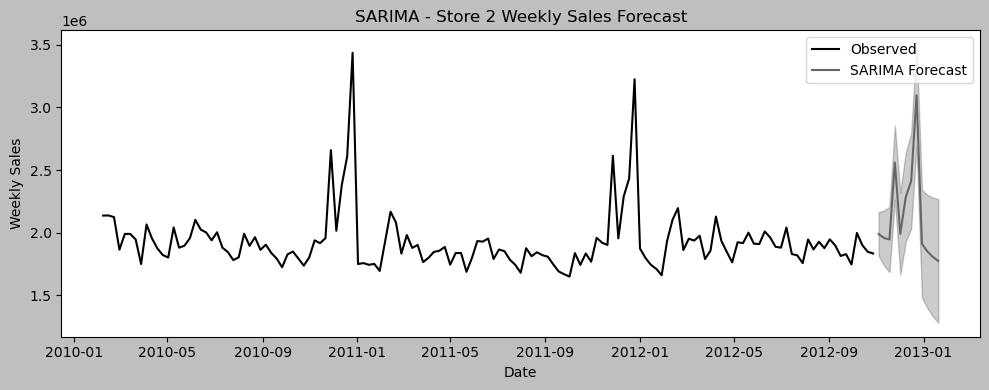

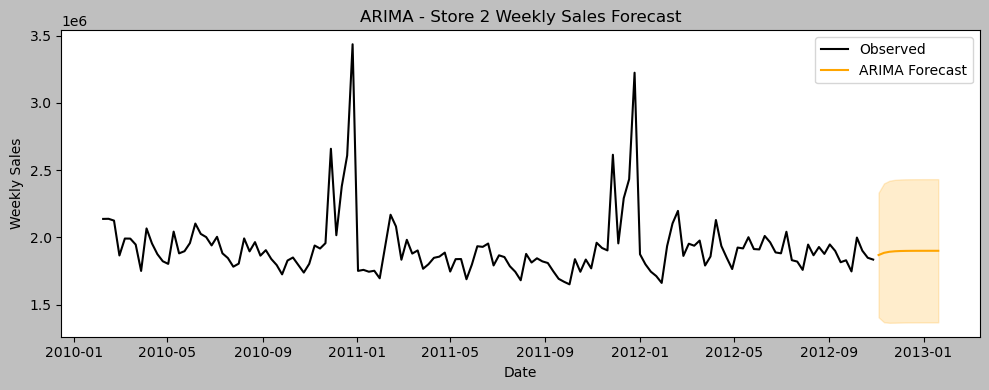


=== Forecasting for Store 3 ===


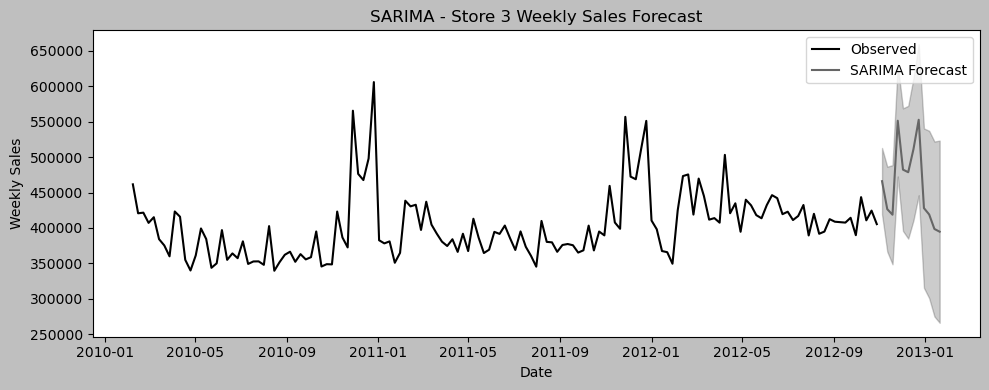

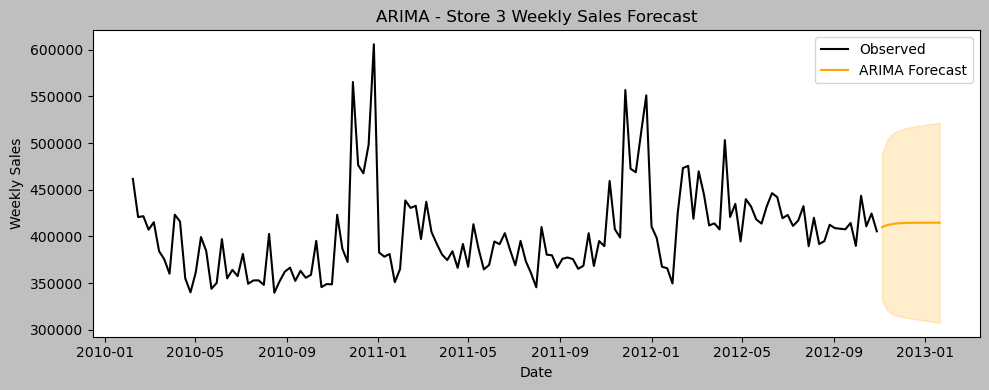


=== Forecasting for Store 4 ===


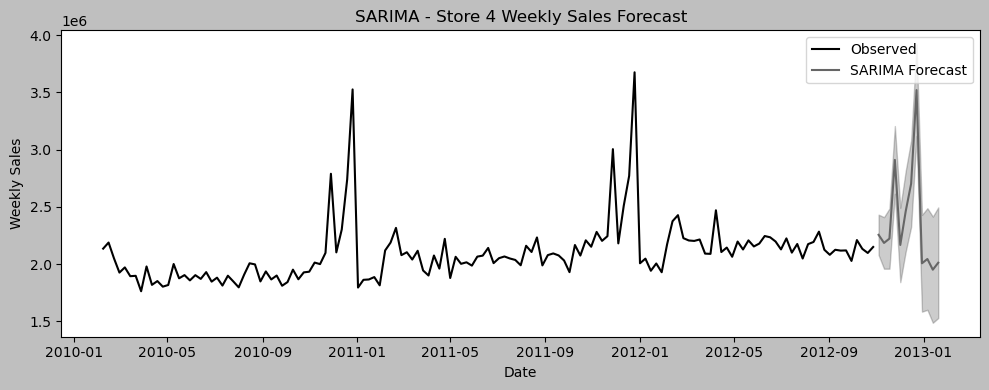

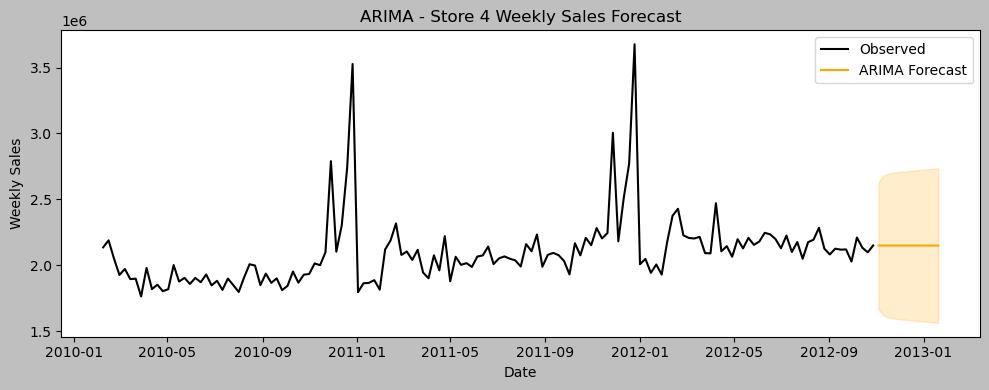


=== Forecasting for Store 5 ===


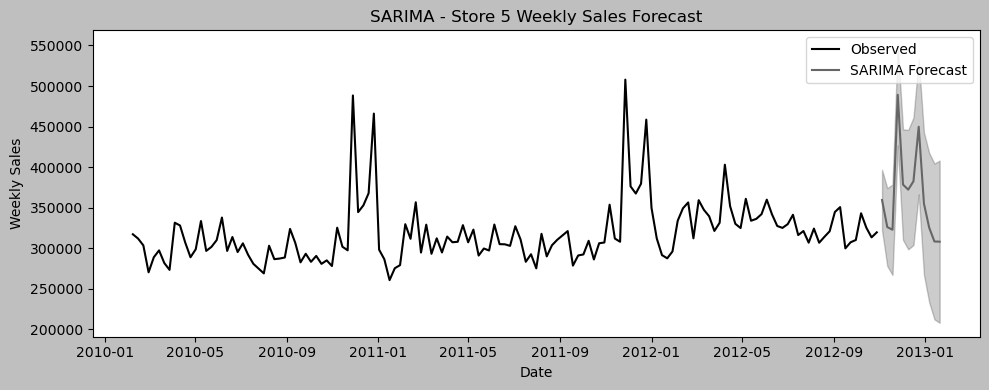

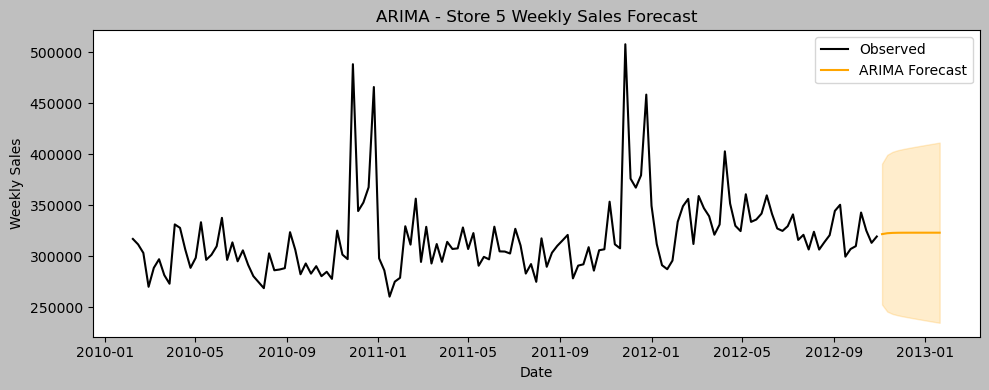

In [378]:
# Forecast weekly sales for each store using SARIMA and ARIMA
for store_id in store_ids:
    store_data = data1[data1['Store'] == store_id]
    weekly_sales = store_data.groupby('Date')['Weekly_Sales'].sum().resample('W').sum()

    print(f"\n=== Forecasting for Store {store_id} ===")

    # SARIMA model
    sarima_model = SARIMAX(weekly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
    sarima_results = sarima_model.fit(disp=False)
    sarima_forecast = sarima_results.get_forecast(steps=12)
    sarima_ci = sarima_forecast.conf_int()

    # Plot SARIMA forecast
    plt.figure(figsize=(10, 4))
    plt.plot(weekly_sales, label='Observed')
    plt.plot(sarima_forecast.predicted_mean, label='SARIMA Forecast')
    plt.fill_between(sarima_ci.index, sarima_ci.iloc[:, 0], sarima_ci.iloc[:, 1], color='k', alpha=.2)
    plt.title(f"SARIMA - Store {store_id} Weekly Sales Forecast")
    plt.xlabel("Date")
    plt.ylabel("Weekly Sales")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ARIMA model
    arima_model = ARIMA(weekly_sales, order=(1, 1, 1))
    arima_results = arima_model.fit()
    arima_forecast = arima_results.get_forecast(steps=12)
    arima_ci = arima_forecast.conf_int()

    # Plot ARIMA forecast
    plt.figure(figsize=(10, 4))
    plt.plot(weekly_sales, label='Observed')
    plt.plot(arima_forecast.predicted_mean, label='ARIMA Forecast', color='orange')
    plt.fill_between(arima_ci.index, arima_ci.iloc[:, 0], arima_ci.iloc[:, 1], color='orange', alpha=.2)
    plt.title(f"ARIMA - Store {store_id} Weekly Sales Forecast")
    plt.xlabel("Date")
    plt.ylabel("Weekly Sales")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [293]:
print(sales.head())
print(sales.columns)

            Weekly_Sales
Date                    
2010-02-05    1528008.64
2010-02-12    1574684.08
2010-02-19    1503298.70
2010-02-26    1336404.65
2010-03-05    1426622.65
Index(['Weekly_Sales'], dtype='object')


In [296]:
# Ensure 'Date' is a column (not index)
#sales.reset_index(inplace=True)

In [299]:
sales

,Weekly_Sales
Date,
2010-02-05,1528008.64
2010-02-12,1574684.08
2010-02-19,1503298.70
2010-02-26,1336404.65
2010-03-05,1426622.65
...,...
2012-09-28,1227430.73
2012-10-05,1422794.26
2012-10-12,1311965.09


In [300]:
# Checking the column names to confirm it's 'Date' and not 'date'
print(sales.columns)

Index(['Weekly_Sales'], dtype='object')


In [301]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [302]:
data1.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [281]:
# Converting the 'Date' column to datetime
#data1['Date'] = pd.to_datetime(data1['Date'], dayfirst=True)
data1.reset_index(inplace=True)
data1['Date'] = pd.to_datetime(data1['Date'], dayfirst=True)
data1.set_index('Date', inplace=True)

In [282]:
data1

,index,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,,
2010-02-05,0,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,2,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,3,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,4,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
2012-09-28,6430,45,713173.95,0,64.88,3.997,192.013558,8.684
2012-10-05,6431,45,733455.07,0,64.89,3.985,192.170412,8.667
2012-10-12,6432,45,734464.36,0,54.47,4.000,192.327265,8.667


In [304]:
# Filter for store 5
store5 = data1[data1['Store'] == 5]

# Group weekly sales using resample
weekly_sales_5 = store5['Weekly_Sales'].resample('W').sum()

# Show a few rows
print(weekly_sales_5.head())

Date
2010-02-07    317173.10
2010-02-14    311825.70
2010-02-21    303447.57
2010-02-28    270281.63
2010-03-07    288855.71
Freq: W-SUN, Name: Weekly_Sales, dtype: float64


In [305]:
data1.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

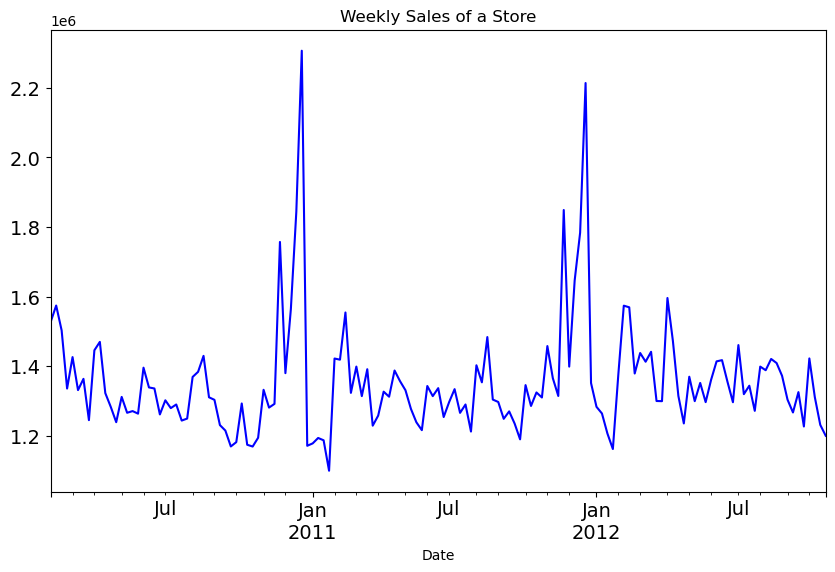

In [306]:
sales.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

<Figure size 640x480 with 0 Axes>

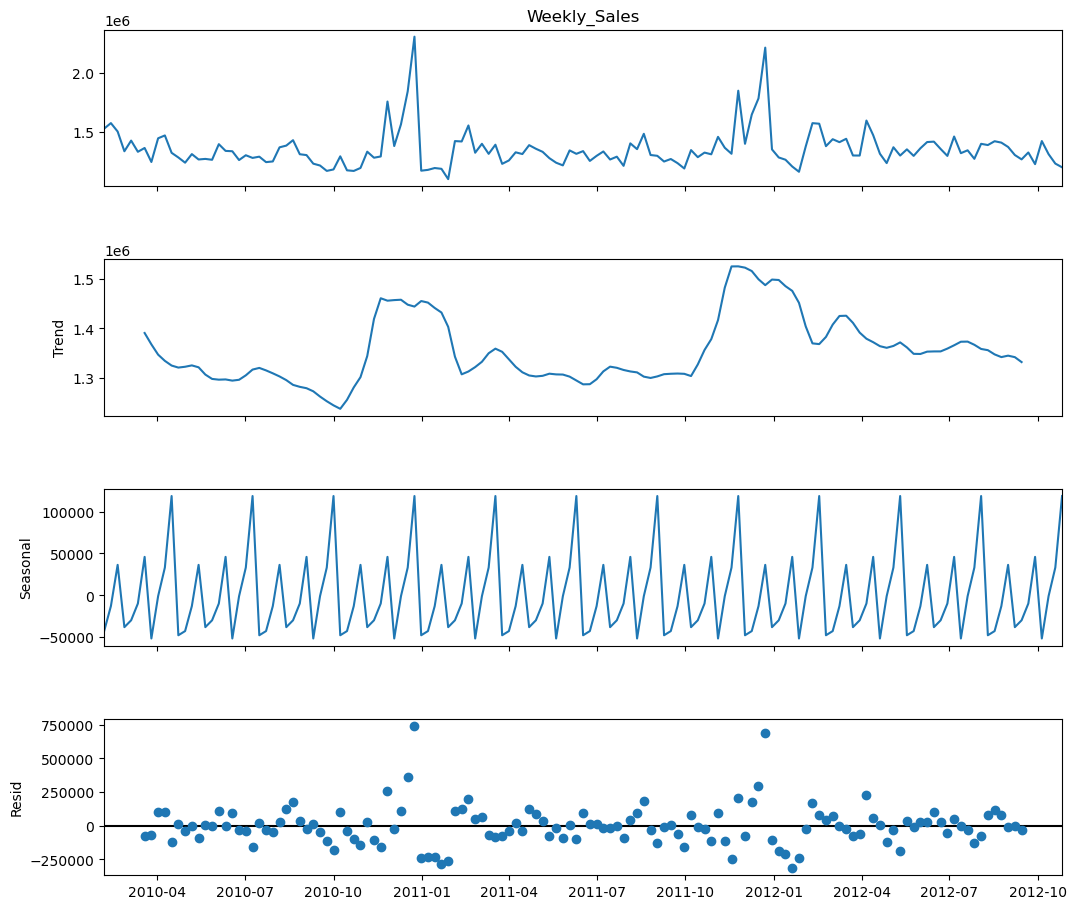

In [307]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

In [308]:
#lets compare the 2012 data of two stores
# Lets take store 5 data for analysis
store5 = data1[data1.Store == 5]
# there are about 45 different stores in this dataset.

sales5 = pd.DataFrame(store5.Weekly_Sales.groupby(store5.index).sum())
sales5.dtypes


Weekly_Sales    float64
dtype: object

In [309]:
# Filter Store 5 and Store 6
store5 = data1[data1['Store'] == 5].copy()
store6 = data1[data1['Store'] == 6].copy()

# Resample weekly sales (automatically aligns by weeks)
weekly_sales_5 = store5['Weekly_Sales'].resample('W').sum()
weekly_sales_6 = store6['Weekly_Sales'].resample('W').sum()

# Combine for comparison
comparison = pd.DataFrame({
    'Store 5': weekly_sales_5,
    'Store 6': weekly_sales_6
})

In [310]:
# Convert Date and set as index
#data1['Date'] = pd.to_datetime(data1['Date'], dayfirst=True)
#data1.set_index('Date', inplace=True)

In [311]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  143 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [312]:
# Grouped weekly sales by store 6
# Reset index to make 'Date' a column again
sales5.reset_index(inplace=True)

# Convert 'Date' column to datetime
# Since your format is "DD-MM-YYYY", use dayfirst=True
sales5['Date'] = pd.to_datetime(sales5['Date'], dayfirst=True)

# Set the 'Date' column back as the index
sales5.set_index('Date', inplace=True)

In [314]:
sales5 = pd.DataFrame(store5.Weekly_Sales.groupby(store5.index).sum())
#sales5.dtypes


In [315]:
y1=sales.Weekly_Sales
y2=sales5.Weekly_Sales

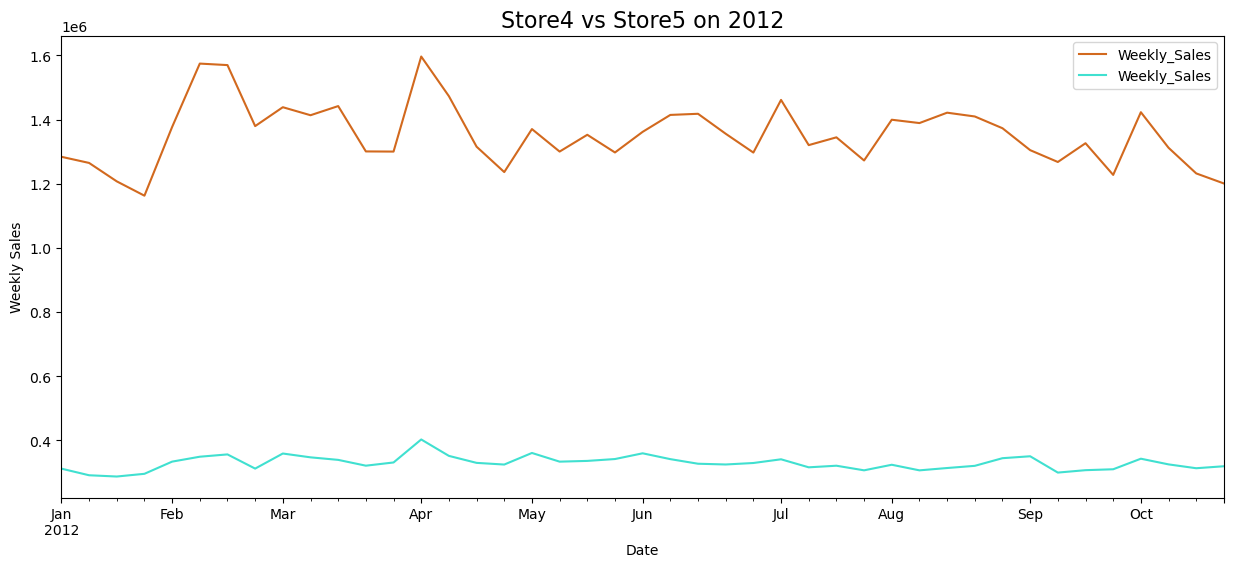

In [316]:
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store5 on 2012', fontsize = '16')
plt.show()

In [82]:
# Clearly we can see the irregularities 

In [317]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)
import itertools
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [323]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),
                                enforce_invertibility=False)

results = mod.fit()

In [320]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


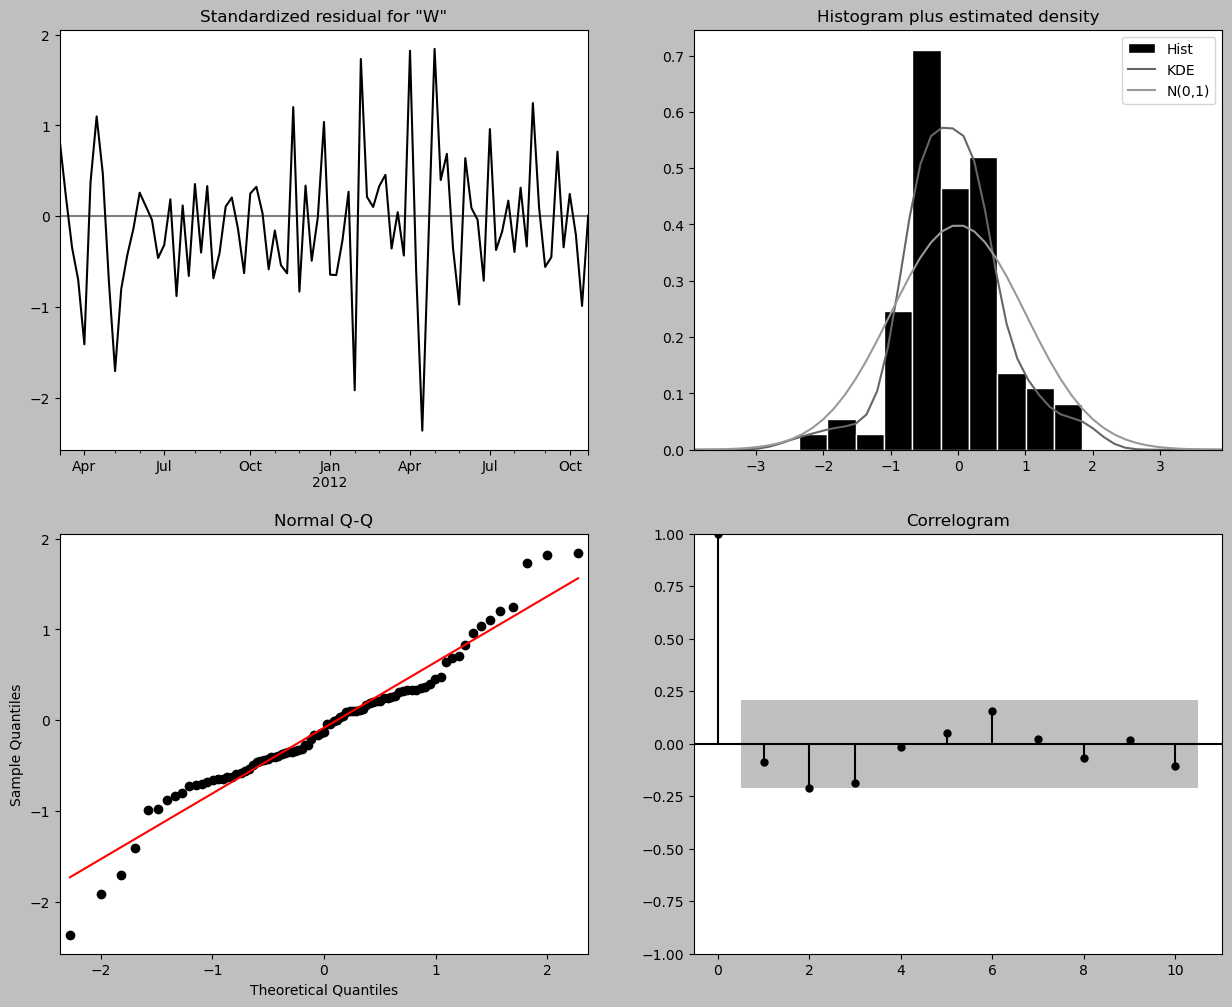

In [325]:
plt.style.use('grayscale')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [326]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

C:\Users\HP\AppData\Local\Temp\ipykernel_8504\2689329424.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed')


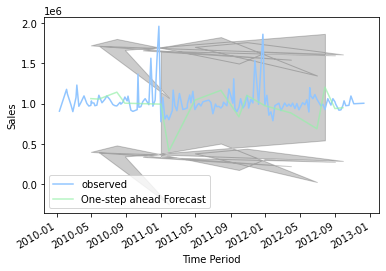

In [87]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [327]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5057685147.97


In [328]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

C:\Users\HP\AppData\Local\Temp\ipykernel_8504\4127785946.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed', figsize=(12, 8))


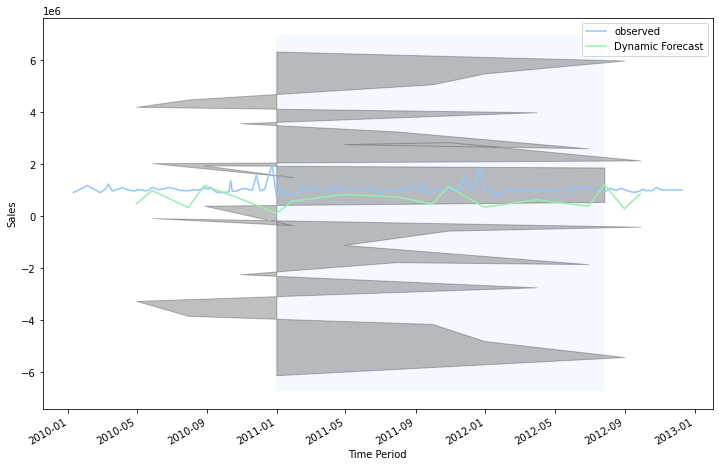

In [90]:


ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()



In [329]:
import numpy as np
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

2012-07-27    1.250029e+06
2012-08-03    1.426646e+06
2012-08-10    1.367610e+06
2012-08-17    1.459363e+06
2012-08-24    1.272784e+06
2012-08-31    1.236610e+06
2012-09-07    1.161411e+06
2012-09-14    1.144381e+06
2012-09-21    1.077604e+06
2012-09-28    1.005143e+06
2012-10-05    1.116858e+06
2012-10-12    1.007350e+06
2012-10-19    9.957578e+05
2012-10-26    9.409788e+05
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [330]:
y_truth = y1['2012-7-27':]

print(y_truth)

Date
2012-07-27    1272395.02
2012-08-03    1399341.07
2012-08-10    1388973.65
2012-08-17    1421307.20
2012-08-24    1409515.73
2012-08-31    1372872.35
2012-09-07    1304584.40
2012-09-14    1267675.05
2012-09-21    1326132.98
2012-09-28    1227430.73
2012-10-05    1422794.26
2012-10-12    1311965.09
2012-10-19    1232073.18
2012-10-26    1200729.45
Name: Weekly_Sales, dtype: float64


In [331]:
# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 188413.38


In [332]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())

Residual for Store1 2225986.291284034


In [333]:
# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

print(pred_uc)

In [334]:
# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

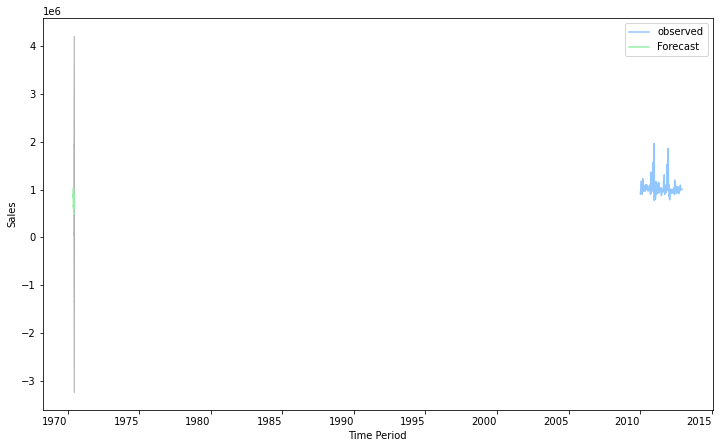

In [97]:


ax = y1.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()



In [352]:
# a. Unemployment vs Weekly Sales
unemployment_impact = data1.groupby('Store')[['Weekly_Sales', 'Unemployment']].corr().iloc[0::2,-1]
unemployment_impact = unemployment_impact.reset_index().drop(columns='level_1')
unemployment_impact.columns = ['Store', 'Sales-Unemployment Corr']
unemployment_impact_sorted = unemployment_impact.sort_values(by='Sales-Unemployment Corr')

print("\nStores most negatively affected by Unemployment:")
print(unemployment_impact_sorted.head())


Stores most negatively affected by Unemployment:
    Store  Sales-Unemployment Corr
37     38                -0.785290
43     44                -0.780076
38     39                -0.384681
41     42                -0.356355
40     41                -0.350630


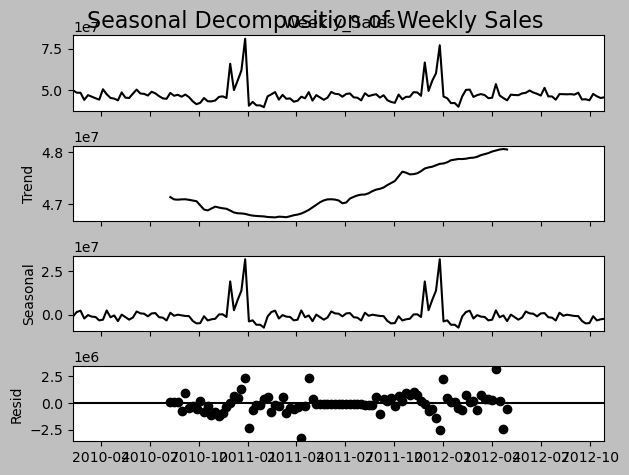

In [353]:
#b. Seasonal Trends in Weekly Sales
from statsmodels.tsa.seasonal import seasonal_decompose

weekly_sales = data1.groupby('Date')['Weekly_Sales'].sum().resample('W').sum()
decomp = seasonal_decompose(weekly_sales, model='additive', period=52)
decomp.plot()
plt.suptitle("Seasonal Decomposition of Weekly Sales", fontsize=16)
plt.show()

In [357]:
data1.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-02-05,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-12,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-03-05,1,1554806.68,0,46.50,2.625,211.350143,8.106


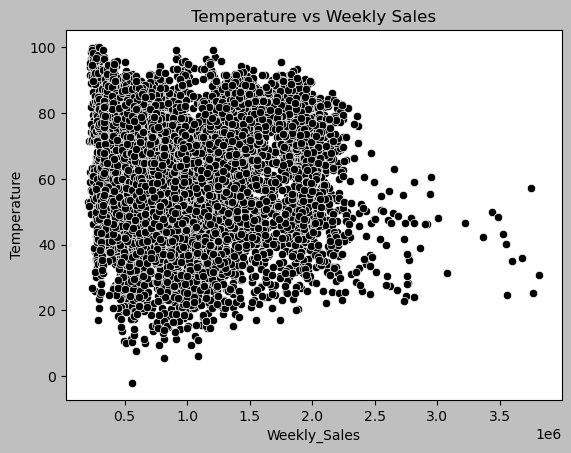

In [371]:
# c. Temperature vs Sales
sns.scatterplot(x='Weekly_Sales', y='Temperature', data=data1)
plt.title('Temperature vs Weekly Sales')
plt.show()

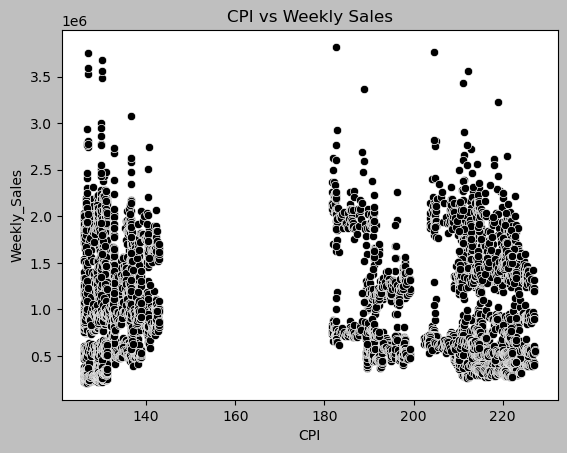

In [372]:
# d. CPI vs Sales
sns.scatterplot(x='CPI', y='Weekly_Sales', data=data1)
plt.title('CPI vs Weekly Sales')
plt.show()


Top Performing Stores:
Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64


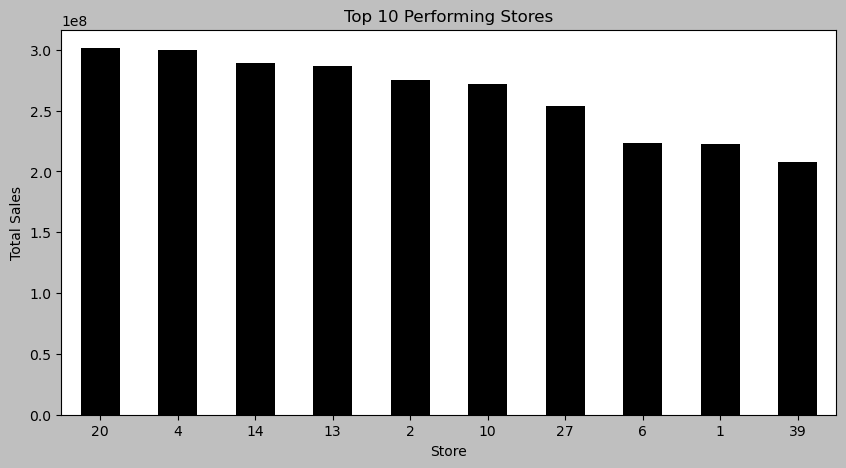

In [362]:
# e. Top Performing Stores
top_stores = data1.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print("\nTop Performing Stores:")
print(top_stores.head())
top_stores.head(10).plot(kind='bar', figsize=(10,5), title="Top 10 Performing Stores")
plt.ylabel("Total Sales")
plt.xlabel("Store")
plt.xticks(rotation=0)
plt.show()

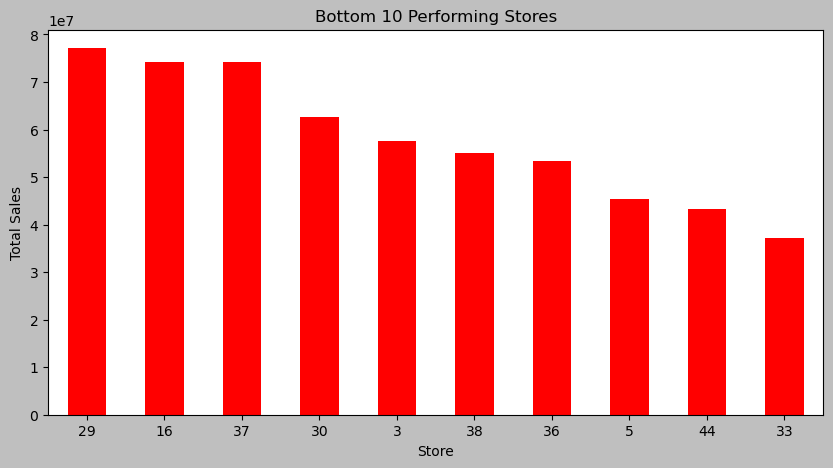

In [363]:
# f. Worst Performing Stores
bottom_stores = top_stores.tail(10)
bottom_stores.plot(kind='bar', color='red', figsize=(10,5), title="Bottom 10 Performing Stores")
plt.ylabel("Total Sales")
plt.xlabel("Store")
plt.xticks(rotation=0)
plt.show()

In [368]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


00:23:40 - cmdstanpy - INFO - Chain [1] start processing
00:23:41 - cmdstanpy - INFO - Chain [1] done processing


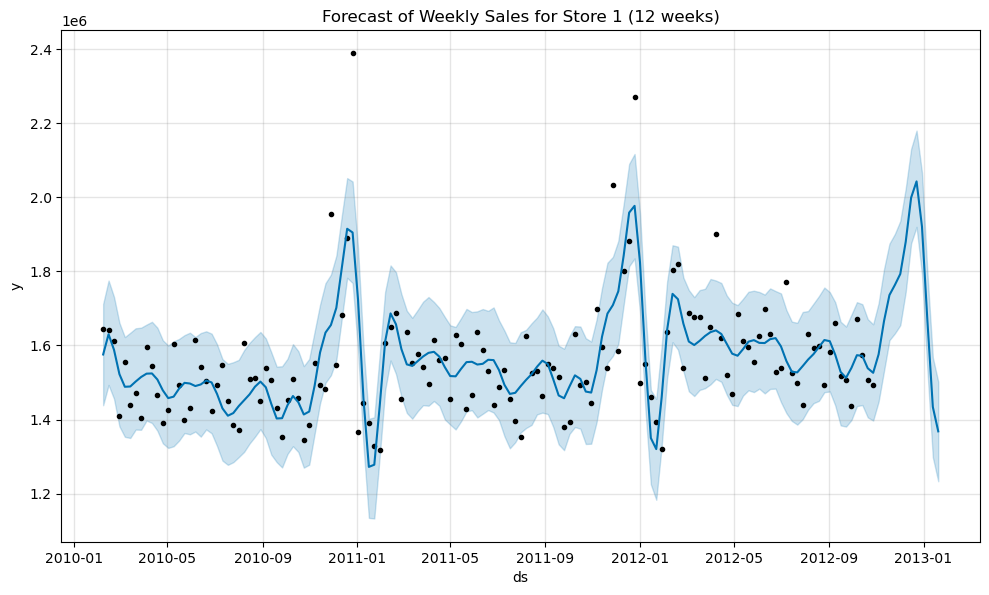

In [370]:
# Forecast for Store 1 using Prophet
from prophet import Prophet
store1 = data1[data1['Store'] == 1]['Weekly_Sales'].resample('W').sum().reset_index()
store1.columns = ['ds', 'y']

model = Prophet()
model.fit(store1)

future = model.make_future_dataframe(periods=12, freq='W')
forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title('Forecast of Weekly Sales for Store 1 (12 weeks)')
plt.show()